
### Bike Sharing Case Study

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


A US bike-sharing provider **BoomBikes** has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state.


In such an attempt, **BoomBikes** aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.


They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

Which variables are significant in predicting the demand for shared bikes.
How well those variables describe the bike demands
Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors.


#Business Goal:
We are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market.



## Step 1: Reading and Understanding the Data


In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Importing Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Reading file

days = pd.read_csv('day.csv')
days.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [ ]:
days.shape

(730, 16)

In [ ]:
days.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [ ]:
#checking datatypes and null values

days.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


We can clearly see that there is no null values which is very good thing.

## Step 2: Data Cleaning


In [ ]:
#keeping data copy for safer side

days1 = days.iloc[:,:16]
days1.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


Removing unwanted columns

1. Dropping **instant** column as it is just carying index value.
2. As we do have year and month column in data so we do not need this **dteday** column
3. We do not need **casual** column as there is no such info needed.
4. We do not need **registered** column as well

In [ ]:

days.drop(['instant','dteday','casual','registered'], axis = 1, inplace = True)
days.shape

(730, 12)

In [ ]:
days.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


## Step 3: Data Visualisation

In [ ]:
#Replacing month number into month name
days.mnth = days.mnth.map({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'june',7:'july',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'})

#Replacing month number into month name
days.weekday = days.weekday.map({0:'sun',1:'mon',2:'tue',3:'wed',4:'thu',5:'fri',6:'sat'})

#Replacing Season num into season label
days.season = days.season.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})

#Replacing weather situation into label
days.weathersit = days.weathersit.map({1:'Clear',2:'Mist',3:'LightxSnow',4:'HeavyxRain'})

#Replacing 0, 1 into the year
days.yr = days.yr.map({1:'2019',0:'2018'})


In [ ]:
days.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,2018,jan,0,mon,1,Mist,14.110847,18.18125,80.5833,10.749882,985
1,spring,2018,jan,0,tue,1,Mist,14.902598,17.68695,69.6087,16.652113,801
2,spring,2018,jan,0,wed,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,2018,jan,0,thu,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,2018,jan,0,fri,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [ ]:
days.corr()

,holiday,workingday,temp,atemp,hum,windspeed,cnt
holiday,1.000000,-0.257009,-0.028764,-0.032703,-0.015662,0.006257,-0.068764
workingday,-0.257009,1.000000,0.002044,0.010657,0.053770,-0.002453,-0.027640
temp,-0.028764,0.002044,1.000000,0.991696,0.128565,-0.158186,0.627044
atemp,-0.032703,0.010657,0.991696,1.000000,0.141512,-0.183876,0.630685
hum,-0.015662,0.053770,0.128565,0.141512,1.000000,-0.248506,-0.098543
windspeed,0.006257,-0.002453,-0.158186,-0.183876,-0.248506,1.000000,-0.235132
cnt,-0.068764,-0.027640,0.627044,0.630685,-0.098543,-0.235132,1.000000


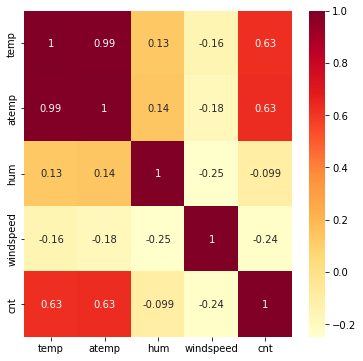

In [ ]:
co = days[['temp','atemp','hum','windspeed','cnt']]
plt.figure(figsize = (6,6))
sns.heatmap(co.corr(), annot = True, cmap="YlOrRd")
plt.show()

### Visualising numerical value

<Figure size 864x1728 with 0 Axes>

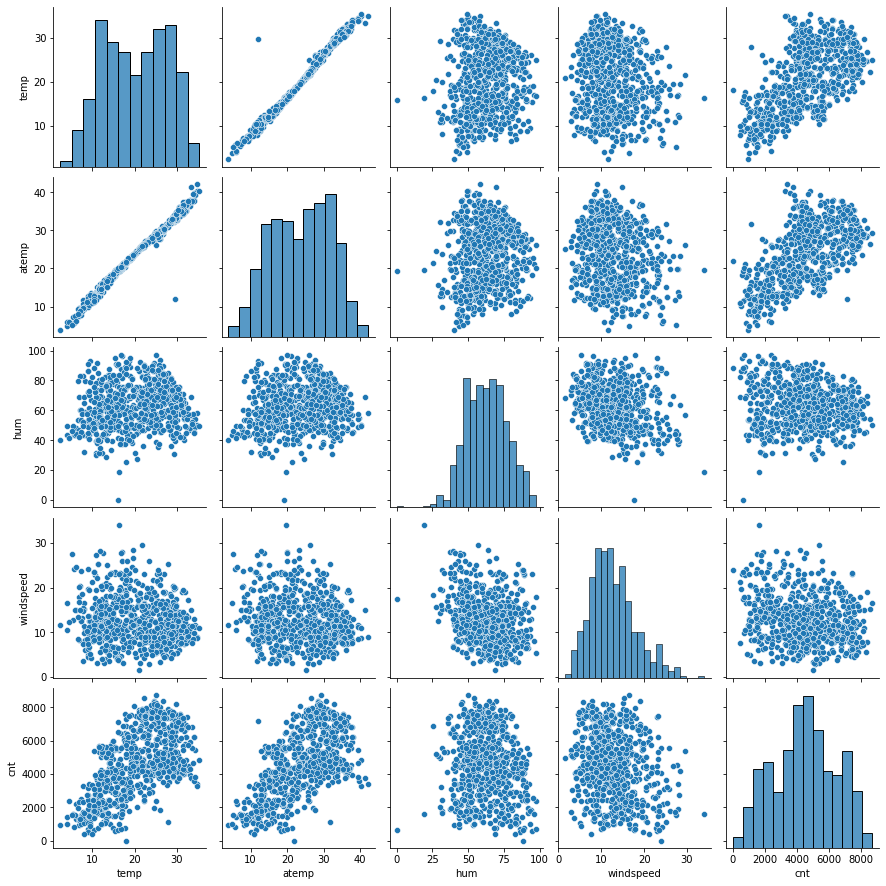

In [ ]:
## Visualising numerical value and checkig for linear relationship

plt.figure(figsize = (12,24))
sns.pairplot(data=days,vars=['temp','atemp','hum','windspeed','cnt'])
plt.show()

### Visualising Categorical Variables

As you might have noticed, there are a few categorical variables as well. Let's make a boxplot for some of these variables.

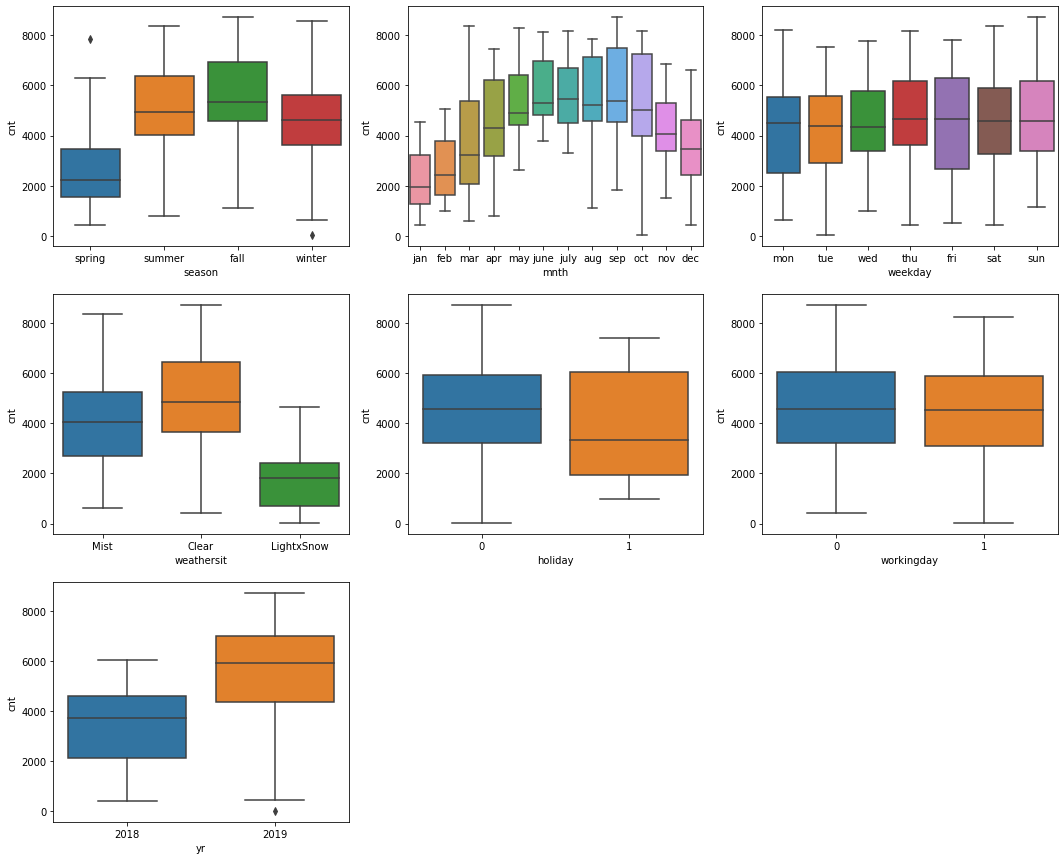

In [ ]:
plt.figure(figsize=(18, 15))
plt.subplot(3,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = days)
plt.subplot(3,3,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = days)
plt.subplot(3,3,3)
sns.boxplot(x = 'weekday', y = 'cnt', data = days)
plt.subplot(3,3,4)
sns.boxplot(x = 'weathersit', y = 'cnt', data = days)
plt.subplot(3,3,5)
sns.boxplot(x = 'holiday', y = 'cnt', data = days)
plt.subplot(3,3,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = days)
plt.subplot(3,3,7)
sns.boxplot(x = 'yr', y = 'cnt', data = days)
plt.show()

Comparing 'cnt' column with respect to year

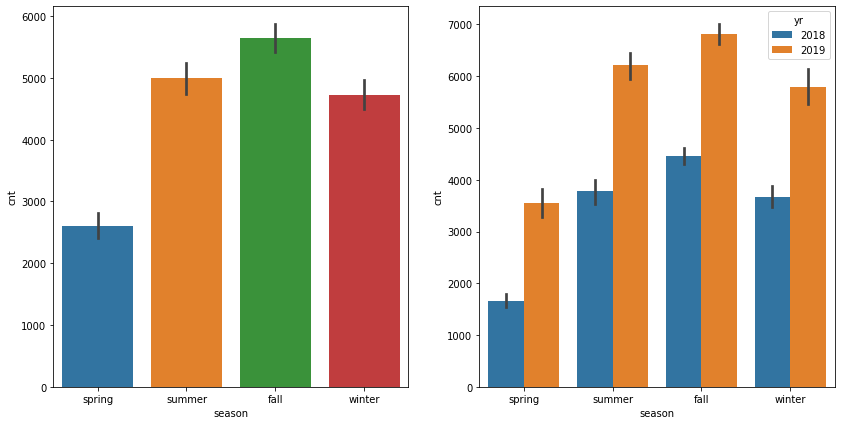

In [ ]:
plt.figure(figsize=(14, 7))
plt.subplot(1,2,1)
sns.barplot(data = days, x = 'season', y='cnt')
plt.subplot(1,2,2)
sns.barplot(data = days, x = 'season', y='cnt', hue = 'yr')
plt.show()

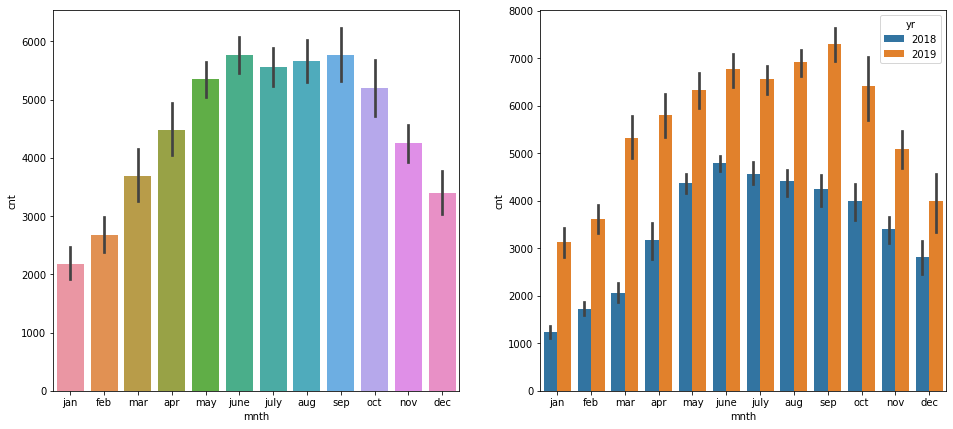

In [ ]:
plt.figure(figsize=(16, 7))
plt.subplot(1,2,1)
sns.barplot(data = days, x = 'mnth', y='cnt')
plt.subplot(1,2,2)
sns.barplot(data = days, x = 'mnth', y='cnt', hue = 'yr')
plt.show()

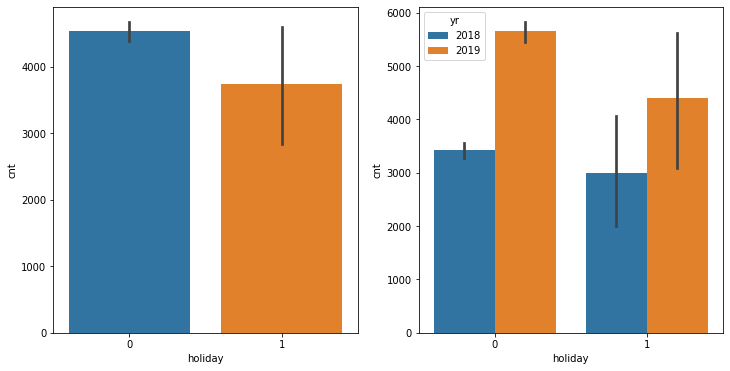

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1,2,1)
sns.barplot(data = days, x = 'holiday', y='cnt')
plt.subplot(1,2,2)
sns.barplot(data = days, x = 'holiday', y='cnt', hue = 'yr')
plt.show()

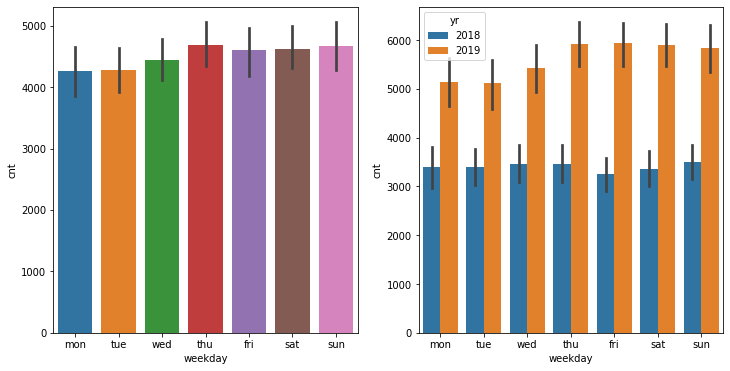

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1,2,1)
sns.barplot(data = days, x = 'weekday', y='cnt')
plt.subplot(1,2,2)
sns.barplot(data = days, x = 'weekday', y='cnt', hue = 'yr')
plt.show()

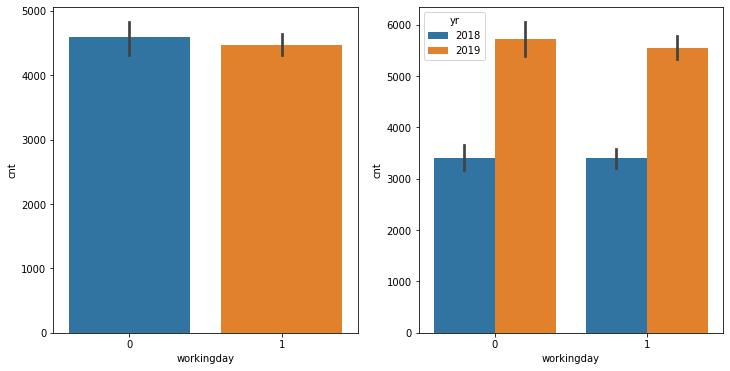

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1,2,1)
sns.barplot(data = days, x = 'workingday', y='cnt')
plt.subplot(1,2,2)
sns.barplot(data = days, x = 'workingday', y='cnt', hue = 'yr')
plt.show()

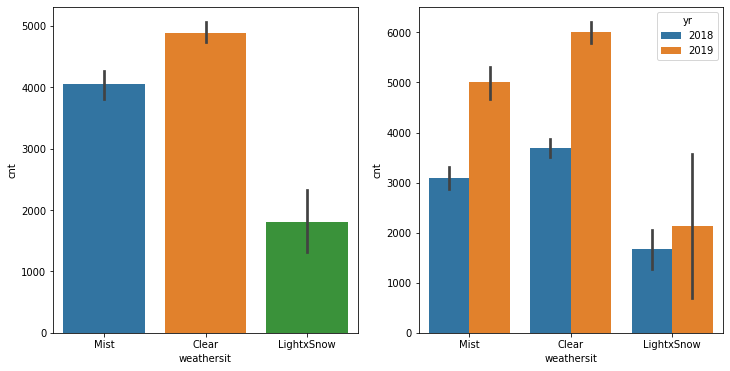

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1,2,1)
sns.barplot(data = days, x = 'weathersit', y='cnt')
plt.subplot(1,2,2)
sns.barplot(data = days, x = 'weathersit', y='cnt', hue = 'yr')
plt.show()

## Step 4: Data Preparation for Linear Regression

In [ ]:
# converting year label into number where 2019 = 1 and 2018 = 0;
days.yr = days.yr.map({'2019':1,'2018':0})

In [ ]:
days_new = pd.get_dummies(data=days,columns=["season","mnth","weekday","weathersit"],drop_first=True)

In [ ]:
days_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   yr                     730 non-null    int64  
 1   holiday                730 non-null    int64  
 2   workingday             730 non-null    int64  
 3   temp                   730 non-null    float64
 4   atemp                  730 non-null    float64
 5   hum                    730 non-null    float64
 6   windspeed              730 non-null    float64
 7   cnt                    730 non-null    int64  
 8   season_spring          730 non-null    uint8  
 9   season_summer          730 non-null    uint8  
 10  season_winter          730 non-null    uint8  
 11  mnth_aug               730 non-null    uint8  
 12  mnth_dec               730 non-null    uint8  
 13  mnth_feb               730 non-null    uint8  
 14  mnth_jan               730 non-null    uint8  
 15  mnth_j

In [ ]:
days_new.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_oct,mnth_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_LightxSnow,weathersit_Mist
0,0,0,1,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,1,0,0,0,0,0,0,1
1,0,0,1,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,0,0,1,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,0,0,0


## Step 5: Splitting the Data into Training and Testing Sets

In [ ]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)

days_train, days_test = train_test_split(days_new, train_size = 0.7, random_state = 100)

In [ ]:
print(days_new.shape)
print(days_train.shape)
print(days_test.shape)

(730, 30)
(510, 30)
(220, 30)


### Rescaling the Features

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
numvars = ['temp','atemp','hum','windspeed','cnt']
scaler = MinMaxScaler()
days_train[numvars] = scaler.fit_transform(days_train[numvars])

In [ ]:
days_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_oct,mnth_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_LightxSnow,weathersit_Mist
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,0,0,0,0,1,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,...,0,0,0,0,1,0,0,0,0,1
728,1,0,1,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,...,0,0,1,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,...,0,0,0,0,1,0,0,0,0,1
111,0,0,0,0.345824,0.318819,0.751824,0.380981,0.191095,0,1,...,0,0,0,0,1,0,0,0,0,1


## Step 6 : Model Building
Recursive feature elimination: We will be using the LinearRegression function from SciKit Learn for its compatibility with RFE (which is a utility from sklearn)

In [ ]:
y_train = days_train.pop('cnt')
X_train = days_train

In [ ]:
X_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_spring,season_summer,season_winter,...,mnth_oct,mnth_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_LightxSnow,weathersit_Mist
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0,0,0,...,0,0,0,0,0,0,0,1,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,1,0,0,...,0,0,0,0,1,0,0,0,0,1
728,1,0,1,0.245101,0.200348,0.498067,0.663106,1,0,0,...,0,0,1,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0,1,0,...,0,0,0,0,1,0,0,0,0,1
111,0,0,0,0.345824,0.318819,0.751824,0.380981,0,1,0,...,0,0,0,0,1,0,0,0,0,1


In [ ]:
X_train.columns


Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'season_spring', 'season_summer', 'season_winter', 'mnth_aug',
       'mnth_dec', 'mnth_feb', 'mnth_jan', 'mnth_july', 'mnth_june',
       'mnth_mar', 'mnth_may', 'mnth_nov', 'mnth_oct', 'mnth_sep',
       'weekday_mon', 'weekday_sat', 'weekday_sun', 'weekday_thu',
       'weekday_tue', 'weekday_wed', 'weathersit_LightxSnow',
       'weathersit_Mist'],
      dtype='object')

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

In [ ]:
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, step = 15)
rfe = rfe.fit(X_train, y_train)

In [ ]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', False, 2),
 ('season_summer', False, 2),
 ('season_winter', True, 1),
 ('mnth_aug', False, 2),
 ('mnth_dec', False, 2),
 ('mnth_feb', False, 2),
 ('mnth_jan', True, 1),
 ('mnth_july', False, 2),
 ('mnth_june', False, 2),
 ('mnth_mar', False, 2),
 ('mnth_may', False, 2),
 ('mnth_nov', False, 2),
 ('mnth_oct', False, 2),
 ('mnth_sep', True, 1),
 ('weekday_mon', False, 2),
 ('weekday_sat', True, 1),
 ('weekday_sun', True, 1),
 ('weekday_thu', False, 2),
 ('weekday_tue', False, 2),
 ('weekday_wed', False, 2),
 ('weathersit_LightxSnow', True, 1),
 ('weathersit_Mist', True, 1)]

In [ ]:
colm = X_train.columns[rfe.support_]
colm

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'season_winter', 'mnth_jan', 'mnth_sep', 'weekday_sat', 'weekday_sun',
       'weathersit_LightxSnow', 'weathersit_Mist'],
      dtype='object')

#### Building model using statsmodel, for the detailed statistics

In [ ]:
def calVIF(daframe):
    vif = pd.DataFrame()
    vif['Features'] = daframe.columns
    vif['VIF'] = [variance_inflation_factor(daframe.values, i) for i in range(daframe.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    print(vif.sort_values(by='VIF',ascending=False))

#### Model 1

In [ ]:
X_train_rfe = X_train[colm]

In [ ]:
X_train_rfe.shape

(510, 14)

In [ ]:
X_train_lm = sm.add_constant(X_train_rfe)
lr1 = sm.OLS(y_train, X_train_lm).fit()
lr1.params

const                    0.300482
yr                       0.230895
holiday                 -0.136602
workingday              -0.043152
temp                     0.420145
atemp                    0.122740
hum                     -0.145811
windspeed               -0.172815
season_winter            0.094960
mnth_jan                -0.076227
mnth_sep                 0.078173
weekday_sat             -0.027692
weekday_sun             -0.025579
weathersit_LightxSnow   -0.245679
weathersit_Mist         -0.049929
dtype: float64

In [ ]:
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     160.7
Date:                Tue, 06 Dec 2022   Prob (F-statistic):          7.63e-174
Time:                        14:24:49   Log-Likelihood:                 475.75
No. Observations:                 510   AIC:                            -921.5
Df Residuals:                     495   BIC:                            -858.0
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.30

In [ ]:
calVIF(X_train_rfe)

                 Features     VIF
4                   atemp  356.17
3                    temp  345.80
5                     hum   35.54
2              workingday   30.61
11            weekday_sun    6.39
10            weekday_sat    6.08
6               windspeed    5.38
13        weathersit_Mist    2.36
0                      yr    2.07
1                 holiday    1.76
7           season_winter    1.74
8                mnth_jan    1.56
12  weathersit_LightxSnow    1.27
9                mnth_sep    1.17


#### Model 2

In [ ]:
## Dropping atemp variable as it is having high VIF and it is highly insignificant because it is having high p value.
X_train_new = X_train_rfe.drop(["atemp"], axis = 1)

In [ ]:
X_train_lm = sm.add_constant(X_train_new)
lr2 = sm.OLS(y_train, X_train_lm).fit()
print(lr2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     173.2
Date:                Tue, 06 Dec 2022   Prob (F-statistic):          8.09e-175
Time:                        14:24:49   Log-Likelihood:                 475.39
No. Observations:                 510   AIC:                            -922.8
Df Residuals:                     496   BIC:                            -863.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.30

In [ ]:
calVIF(X_train_new)

                 Features    VIF
4                     hum  35.32
2              workingday  30.41
3                    temp  11.27
10            weekday_sun   6.35
9             weekday_sat   6.07
5               windspeed   5.23
12        weathersit_Mist   2.36
0                      yr   2.07
1                 holiday   1.76
6           season_winter   1.73
7                mnth_jan   1.55
11  weathersit_LightxSnow   1.26
8                mnth_sep   1.16


#### Model 3

In [ ]:
## dropping workingday varibale as it is having very high VIF value and high p value.
X_train_new = X_train_new.drop(["workingday"], axis = 1)

In [ ]:
X_train_lm = sm.add_constant(X_train_new)
lr3 = sm.OLS(y_train, X_train_lm).fit()
print(lr3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     187.8
Date:                Tue, 06 Dec 2022   Prob (F-statistic):          6.78e-176
Time:                        14:24:49   Log-Likelihood:                 475.22
No. Observations:                 510   AIC:                            -924.4
Df Residuals:                     497   BIC:                            -869.4
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.25

In [ ]:
calVIF(X_train_new)

                 Features    VIF
3                     hum  17.35
2                    temp  10.10
4               windspeed   3.54
11        weathersit_Mist   2.15
0                      yr   2.04
5           season_winter   1.68
6                mnth_jan   1.44
9             weekday_sun   1.19
8             weekday_sat   1.18
10  weathersit_LightxSnow   1.18
7                mnth_sep   1.16
1                 holiday   1.04


#### Model 4

Still we can see that we have **weekday_sat** variable is insignificant and also having negative coefficient so we will remove **weekday_sat**

In [ ]:
## dropping weekday_sat varibale as it is having very high VIF value.

X_train_new = X_train_new.drop(["weekday_sat"], axis = 1)

In [ ]:
X_train_lm = sm.add_constant(X_train_new)
lr4 = sm.OLS(y_train, X_train_lm).fit()
print(lr4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     204.7
Date:                Tue, 06 Dec 2022   Prob (F-statistic):          8.08e-177
Time:                        14:24:49   Log-Likelihood:                 474.65
No. Observations:                 510   AIC:                            -925.3
Df Residuals:                     498   BIC:                            -874.5
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.26

In [ ]:
calVIF(X_train_new)

                 Features    VIF
3                     hum  17.33
2                    temp  10.04
4               windspeed   3.53
10        weathersit_Mist   2.14
0                      yr   2.04
5           season_winter   1.67
6                mnth_jan   1.44
9   weathersit_LightxSnow   1.18
7                mnth_sep   1.16
8             weekday_sun   1.16
1                 holiday   1.04


#### Model 5

In [ ]:
## dropping weekday_sun varibale as it is having very high VIF value.

X_train_new = X_train_new.drop(["weekday_sun"], axis = 1)

In [ ]:
X_train_lm = sm.add_constant(X_train_new)
lr5 = sm.OLS(y_train, X_train_lm).fit()
print(lr5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     224.9
Date:                Tue, 06 Dec 2022   Prob (F-statistic):          1.03e-177
Time:                        14:24:49   Log-Likelihood:                 473.95
No. Observations:                 510   AIC:                            -925.9
Df Residuals:                     499   BIC:                            -879.3
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.26

In [ ]:
calVIF(X_train_new)

                Features    VIF
3                    hum  17.33
2                   temp  10.02
4              windspeed   3.51
9        weathersit_Mist   2.14
0                     yr   2.04
5          season_winter   1.67
6               mnth_jan   1.44
8  weathersit_LightxSnow   1.18
7               mnth_sep   1.16
1                holiday   1.04


#### Model 6

In [ ]:
## dropping hum varibale as it is having very high VIF value.

X_train_new = X_train_new.drop(["hum"], axis = 1)

In [ ]:
X_train_lm = sm.add_constant(X_train_new)
lr6 = sm.OLS(y_train, X_train_lm).fit()
lr6.params

const                    0.183064
yr                       0.234473
holiday                 -0.103266
temp                     0.512295
windspeed               -0.150740
season_winter            0.086490
mnth_jan                -0.080650
mnth_sep                 0.074521
weathersit_LightxSnow   -0.285888
weathersit_Mist         -0.071863
dtype: float64

In [ ]:
print(lr6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.813
Model:                            OLS   Adj. R-squared:                  0.810
Method:                 Least Squares   F-statistic:                     242.3
Date:                Tue, 06 Dec 2022   Prob (F-statistic):          5.27e-176
Time:                        14:24:49   Log-Likelihood:                 467.07
No. Observations:                 510   AIC:                            -914.1
Df Residuals:                     500   BIC:                            -871.8
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.18

In [ ]:
calVIF(X_train_new)

                Features   VIF
2                   temp  3.57
3              windspeed  3.15
0                     yr  2.03
8        weathersit_Mist  1.50
4          season_winter  1.29
5               mnth_jan  1.17
6               mnth_sep  1.16
7  weathersit_LightxSnow  1.08
1                holiday  1.04


Now We can see that the VIFs and p-values both are within an acceptable range. So we are good to go ahead and make our predictions using this model only.

## Step 7: Residual Analysis of the train data

Now, we have to check whether the error terms are normally distibuted or not, and it is infact one of the major assumptions of linear regression.

We will plot histogram of error terms and will see how it looks like.

In [ ]:
y_train_cnt =  lr6.predict(X_train_lm)

Text(0.5, 0, 'Errors')

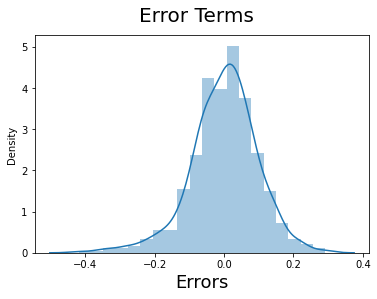

In [ ]:
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading
plt.xlabel('Errors', fontsize = 18)                       # X-label

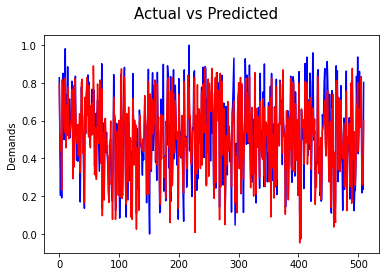

In [ ]:
# Actual vs Predicted
c = [i for i in range(0,len(X_train_new),1)]
plt.plot(c,y_train, color="blue")
plt.plot(c,y_train_cnt, color="red")
plt.suptitle('Actual vs Predicted', fontsize = 15)
plt.ylabel('Demands')
plt.show()

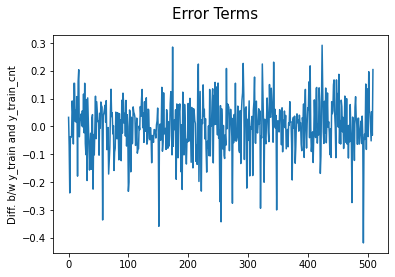

In [ ]:
# Error Terms
c = [i for i in range(0,len(X_train_new),1)]
plt.plot(c,y_train-y_train_cnt)
plt.suptitle('Error Terms', fontsize = 15)

plt.ylabel('Diff. b/w y_train and y_train_cnt')
plt.show()

## Step 8: Making Predictions Using the Final Model

Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final, i.e. fourth model.

In [ ]:
numvars = ['temp','atemp','hum','windspeed','cnt']

days_test[numvars] = scaler.transform(days_test[numvars])

In [ ]:
days_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_oct,mnth_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_LightxSnow,weathersit_Mist
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.640909,0.558718,0.532847,0.638221,0.313293,0.522154,0.254545,0.263636,...,0.086364,0.086364,0.118182,0.172727,0.154545,0.140909,0.122727,0.159091,0.027273,0.318182
std,0.500809,0.187620,0.480828,0.233187,0.217401,0.148694,0.159584,0.219163,0.436599,0.441609,...,0.281541,0.281541,0.323559,0.378873,0.362295,0.348721,0.328872,0.366595,0.163248,0.466833
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.355429,0.344870,0.529197,0.198843,0.378595,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558172,0.544652,0.625590,0.300126,0.524678,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.755981,0.713308,0.743798,0.402718,0.677750,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Dividing into X_test and y_test

In [ ]:
y_test = days_test.pop('cnt');
coln = X_train_new.columns

X_test = days_test[coln]

# Adding constant variable to test dataframe
X_test_new = sm.add_constant(X_test)

In [ ]:
X_test_new.shape

(220, 10)

In [ ]:
X_test_new.head()

,const,yr,holiday,temp,windspeed,season_winter,mnth_jan,mnth_sep,weathersit_LightxSnow,weathersit_Mist
184,1.0,0,1,0.831783,0.084219,0,0,0,0,1
535,1.0,1,0,0.901354,0.153728,0,0,0,0,0
299,1.0,0,0,0.511964,0.334206,1,0,0,0,1
221,1.0,0,0,0.881625,0.339570,0,0,0,0,0
152,1.0,0,0,0.817246,0.537414,0,0,0,0,0


In [ ]:
y_pred_cnt = lr6.predict(X_test_new)

## Step 9: Model Evaluation

Let's now plot the graph for actual versus predicted values.

Text(0, 0.5, 'y_pred')

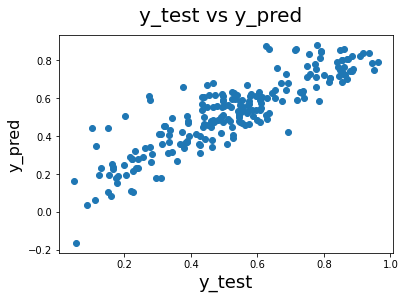

In [ ]:
# Plotting y_test and y_pred to understand the spread
fig = plt.figure()
plt.scatter(y_test, y_pred_cnt)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)

cnt = 0.183064 + 0.234473 x yr - 0.103266 x holiday +  0.512295 x temp - 0.15074 x windspeed + 0.08649 x season_winter - 0.08065  x mnth_jan +  0.074521 x mnth_sep - 0.285888 x weathersit_LightxSnow - 0.071863 x weathersit_Mist


In [ ]:
#Calculating r2_score
r2 = r2_score(y_test, y_pred_cnt)

round(r2,2)

0.77

In [ ]:
#Calculating adjusted R squared.
n = X_test_new.shape[0]
p = X_test_new.shape[1]

adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
round(adjusted_r2,2)


0.76

### **Final Result Comparison**

R-squared in Train data set:0.813

Adjusted R-squared in Train data set:0.81

R-squared in Test data set :0.77

Adjusted R-squared in Test data set:0.76


We can predict below things:

*   The demands gets higher when temprature increases.

*   In the month of september we have higher number of bookings

*   In the winter season, demands increases.

*   In Rainy season or snowfall, demands decreases.

*   In holiday, people do not prefer bike sharing.

*   When wind speed increases then people lessly prefer bike.

